# **Data Transformation**

## **Question 1**

You'll be using the pnwflights14 dataset which contains information about all flights that departed from the two major airports of the Pacific Northwest (PNW), SEA in Seattle and PDX in Portland, in 2014: 162,049 flights in total.

Use appropriate encoding methods on the categorical attributes for the dataframe. Make sure that all the columns are numerical at the end of your implementation. Use **at least** two encoding methods and choose the method that is appropriate to the column you are encoding.

### **Solution**

In [34]:

# Modules we'll use
import pandas as pd
import numpy as np

# For min_max scaling
from sklearn.preprocessing import MinMaxScaler

# For z-score scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# For Box-Cox Normalization
from scipy import stats

# Plotting modules
from pandas.plotting import scatter_matrix
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

def get_path(dataset_name,env_name='colab'):
    """
    This function is used to return the path of the dataset you want to use. 
    
    @params:
    dataset_name: the name of the dataset. 
    env_name: it has two values either local, or colab the default is colab
    """
    prefix = 'https://raw.githubusercontent.com/mohamed-ashry7/Data-Engineering-Lab/main/Datasets/'
    if env_name == 'colab':
        return prefix+dataset_name
    else:
        return f'../Datasets/{dataset_name}'



In [35]:
df_flights = pd.read_csv(get_path('Flights.csv'))
df_flights.head()

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,0,2014,1,1,1.0,96.0,235.0,70.0,AS,N508AS,145,PDX,ANC,194.0,1542,0.0,1.0
1,1,2014,1,1,4.0,-6.0,738.0,-23.0,US,N195UW,1830,SEA,CLT,252.0,2279,0.0,4.0
2,2,2014,1,1,8.0,13.0,548.0,-4.0,UA,N37422,1609,PDX,IAH,201.0,1825,0.0,8.0
3,3,2014,1,1,28.0,-2.0,800.0,-23.0,US,N547UW,466,PDX,CLT,251.0,2282,0.0,28.0
4,4,2014,1,1,34.0,44.0,325.0,43.0,AS,N762AS,121,SEA,ANC,201.0,1448,0.0,34.0


 So to be able to choose which label method we will inspect the number of unique values 


In [36]:
print(df_flights.carrier.unique().size)
print(df_flights.tailnum.unique().size)
print(df_flights.origin.unique().size)
print(df_flights.dest.unique().size)

11
3018
2
71


So, As we can see the carrier and origin have small number of unique values and the tailnum and dest have big number. 

Therefore, we will use One Hot Encoding for carrier and origin and the Label Encoding for the tailnum and dest columns

In [37]:
one_hot = pd.get_dummies(df_flights[['carrier','origin']])
one_hot

,carrier_AA,carrier_AS,carrier_B6,carrier_DL,carrier_F9,carrier_HA,carrier_OO,carrier_UA,carrier_US,carrier_VX,carrier_WN,origin_PDX,origin_SEA
0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
160743,0,0,0,0,0,0,0,1,0,0,0,0,1
160744,0,1,0,0,0,0,0,0,0,0,0,0,1
160745,0,1,0,0,0,0,0,0,0,0,0,0,1
160746,0,0,0,0,0,0,0,1,0,0,0,1,0


In [38]:
df_flights = pd.concat([df_flights,one_hot],axis=1)


In [39]:
# WE can safely drop the columns carrier and origin 
df_flights.drop(['carrier','origin'],axis=1,inplace=True)

In [40]:
df_flights.head()

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,tailnum,flight,...,carrier_DL,carrier_F9,carrier_HA,carrier_OO,carrier_UA,carrier_US,carrier_VX,carrier_WN,origin_PDX,origin_SEA
0,0,2014,1,1,1.0,96.0,235.0,70.0,N508AS,145,...,0,0,0,0,0,0,0,0,1,0
1,1,2014,1,1,4.0,-6.0,738.0,-23.0,N195UW,1830,...,0,0,0,0,0,1,0,0,0,1
2,2,2014,1,1,8.0,13.0,548.0,-4.0,N37422,1609,...,0,0,0,0,1,0,0,0,1,0
3,3,2014,1,1,28.0,-2.0,800.0,-23.0,N547UW,466,...,0,0,0,0,0,1,0,0,1,0
4,4,2014,1,1,34.0,44.0,325.0,43.0,N762AS,121,...,0,0,0,0,0,0,0,0,0,1


In [41]:
# For label encoding we can use the LabelEncoder from sklearn library
df_flights['dest']=LabelEncoder().fit_transform(df_flights['dest'])
df_flights['tailnum']=LabelEncoder().fit_transform(df_flights['tailnum'])

In [42]:
df_flights.head()

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,tailnum,flight,...,carrier_DL,carrier_F9,carrier_HA,carrier_OO,carrier_UA,carrier_US,carrier_VX,carrier_WN,origin_PDX,origin_SEA
0,0,2014,1,1,1.0,96.0,235.0,70.0,1284,145,...,0,0,0,0,0,0,0,0,1,0
1,1,2014,1,1,4.0,-6.0,738.0,-23.0,167,1830,...,0,0,0,0,0,1,0,0,0,1
2,2,2014,1,1,8.0,13.0,548.0,-4.0,586,1609,...,0,0,0,0,1,0,0,0,1,0
3,3,2014,1,1,28.0,-2.0,800.0,-23.0,1426,466,...,0,0,0,0,0,1,0,0,1,0
4,4,2014,1,1,34.0,44.0,325.0,43.0,2275,121,...,0,0,0,0,0,0,0,0,0,1


## **Question 2**

Use the following dataset: https://raw.githubusercontent.com/TrainingByPackt/Data-Science-with-Python/master/Chapter01/Data/Student_bucketing.csv

Discretize the `marks` column using the following ranges:['Poor','Below_average','Average','Above_Average','Excellent']. Each range should contain 20 marks. Poor(0-20), Below_average(21-40) and so on till Excellent(80-100) And then visualize them.

### **Solution**

In [43]:
df = pd.read_csv('https://raw.githubusercontent.com/TrainingByPackt/Data-Science-with-Python/master/Chapter01/Data/Student_bucketing.csv')
df.head()

,Student_id,Age,Grade,Employed,marks
0,1,19,1st Class,yes,29
1,2,20,2nd Class,no,41
2,3,18,1st Class,no,57
3,4,21,2nd Class,no,29
4,5,19,1st Class,no,57


In [44]:
marks_cat = pd.cut(df['marks'], [0,20,40,60,80,100] , labels=['Poor','Below_average','Average','Above_Average','Excellent'])
marks_cat

0      Below_average
1            Average
2            Average
3      Below_average
4            Average
           ...      
227          Average
228          Average
229    Below_average
230    Above_Average
231    Below_average
Name: marks, Length: 232, dtype: category
Categories (5, object): [Poor < Below_average < Average < Above_Average < Excellent]

In [46]:
df["marks_cat"] =marks_cat

In [47]:
df.head()

,Student_id,Age,Grade,Employed,marks,marks_cat
0,1,19,1st Class,yes,29,Below_average
1,2,20,2nd Class,no,41,Average
2,3,18,1st Class,no,57,Average
3,4,21,2nd Class,no,29,Below_average
4,5,19,1st Class,no,57,Average


In [48]:
group = df.groupby('marks_cat')['Age'].size()

In [49]:
group

marks_cat
Poor              4
Below_average    64
Average          50
Above_Average    63
Excellent        51
Name: Age, dtype: int64

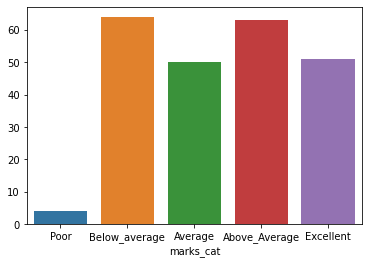

In [50]:
sns.barplot(group.index, group.values)